In [12]:
#import json file and convert to dataframe
import pandas as pd
import json
from pandas.io.json import json_normalize


#load json file
with open('C:/Users/MehmetCemAkuras/Desktop/3rd Semester/Project Management and Data Analytics Lab/Tweets2GPT/Data/Raw/tweets_ws23_v1.json') as json_file:
    json_data = json.load(json_file)


In [13]:
#show loaded json data
json_data

[{'source_created_at': '2020-09-18 21:56:20.798000',
  'author_id': '593731316',
  'text': '@DSisourath The Thameslink core between London St Pancras and London Blackfriars in rush hours onlybut the in cab rubbish rarely works',
  'source': 'sprinklr',
  'language': 'en',
  'longitude': -0.12574,
  'latitude': 51.50853,
  'id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
  'labels': {'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'relevant': True,
     'topic': 'service',
     'ground_truth': True,
     'id': '8655353b-cc71-1e89-95d5-1c4e6bf200e1'}],
   'sentiment': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'sentiment': 'negative',
     'ground_truth': True,
     'id': '5ee4d218-65a9-70a0-0964-a5b00e594a41'}]}},
 {'source_created_at': '2020-10-13 07:31:53.122000',
  'author_id': '745583289520496640',
  'text': '@DulwichHistory Loving the complaint about people having to wait 10 minutes for a train

In [14]:
def get_all_keys(obj):
    keys = set()
    if isinstance(obj, dict):
        keys.update(obj.keys())
        for value in obj.values():
            keys.update(get_all_keys(value))
    elif isinstance(obj, list):
        for item in obj:
            keys.update(get_all_keys(item))
    return keys

# Get all unique keys
all_keys = get_all_keys(json_data)

# Convert the set to a list to see all unique keys
all_keys_list = list(all_keys)
print(all_keys_list)


['author_id', 'sentiment', 'language', 'topic', 'id', 'tweet_id', 'ground_truth', 'longitude', 'relevant', 'user_id', 'labels', 'source_id', 'latitude', 'source', 'text', 'source_created_at']


In [15]:
def flatten_json(y):
    """Flatten a nested JSON object"""
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

# Flatten the JSON data
flattened_data = [flatten_json(entry) for entry in json_data]

# Convert the list of flattened dictionaries to a DataFrame
df = pd.DataFrame(flattened_data)

# Show the DataFrame
df

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94,NaN
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431,NaN
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,NaN
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,aca953e8-bec4-216a-5a6e-e3530e420fa9,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,neutral,True,be02e403-49c2-e366-3324-09f1696ce526,1149220424313708544
16945,2020-08-10 11:19:10.181000,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,e170272d-5e5c-6ce7-ba7c-748aa56073d7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,neutral,True,a0c0e79c-11ee-4700-45b2-dcf7234f0a10,NaN
16946,2020-08-29 09:51:10.833000,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,356eb822-07b7-ca2d-0087-56284ce2e95b,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,neutral,True,786bb503-8ec0-6a21-ea3f-6995ceb7e3e0,NaN
16947,2020-11-02 12:06:06.967000,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,3f6f4be1-37c7-17cb-56c3-2e91b0ae237a,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,neutral,True,399d6906-75db-1150-0f34-414c6cf917cf,NaN


***IT IS SEEN THAT TITLES NEED TO BE REEVALUTATED***

In [16]:
#show labels_topic_0_topic's unique values
df['labels_topic_0_topic'].unique()

array(['service', 'delays', 'toilets', 'seats', 'wifi',
       'tickets/seat_reservations', 'none', 'station', 'covid', 'doors',
       'train_general', 'air conditioning', 'brakes', 'tables', 'plugs',
       'noise', 'windows', 'hvac', 'announcements', 'vandalism', 'floor',
       'roof', 'handrails'], dtype=object)

In [17]:
#count columns and rows
df.shape

(16949, 20)

In [18]:
#Count total number of tweets in text column
df['text'].count()

16949

IT IS SEEN THAT ALL ROWS HAVE A TEXT

In [19]:
#Find total number of retweets in text column
df['text'].str.contains('RT').sum()

37

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df is your DataFrame with a column named 'text'

# Create a TF-IDF vectorizer to convert text into numerical vectors
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorizer to 'text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Compute cosine similarity
similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Set thresholds for similarity (between 90% and 99%)
lower_threshold = 0.9
upper_threshold = 0.99

# Keep track of visited rows to avoid duplicates
visited = set()

# Find similar rows within the specified similarity range
similar_pairs = []

for i in range(len(similarities)):
    for j in range(i+1, len(similarities)):
        if lower_threshold <= similarities[i, j] <= upper_threshold:
            if i not in visited and j not in visited:
                similar_pairs.append((i, j))
                visited.add(i)
                visited.add(j)

# Print similar pairs
for pair in similar_pairs:
    print(f"Row {pair[0]} and Row {pair[1]} are similar.")

# Print the total number of similar pairs
total_similar_pairs = len(similar_pairs)
print(f"Total number of similar pairs: {total_similar_pairs}")


Row 111 and Row 400 are similar.
Row 129 and Row 133 are similar.
Row 137 and Row 441 are similar.
Row 313 and Row 4410 are similar.
Row 465 and Row 3626 are similar.
Row 560 and Row 561 are similar.
Row 602 and Row 603 are similar.
Row 604 and Row 4413 are similar.
Row 671 and Row 832 are similar.
Row 672 and Row 673 are similar.
Row 678 and Row 679 are similar.
Row 682 and Row 683 are similar.
Row 687 and Row 906 are similar.
Row 688 and Row 689 are similar.
Row 695 and Row 956 are similar.
Row 698 and Row 1047 are similar.
Row 702 and Row 703 are similar.
Row 704 and Row 705 are similar.
Row 706 and Row 981 are similar.
Row 707 and Row 982 are similar.
Row 715 and Row 1017 are similar.
Row 719 and Row 720 are similar.
Row 722 and Row 723 are similar.
Row 727 and Row 1039 are similar.
Row 733 and Row 1055 are similar.
Row 735 and Row 736 are similar.
Row 738 and Row 739 are similar.
Row 740 and Row 1071 are similar.
Row 750 and Row 1097 are similar.
Row 759 and Row 1140 are similar.


In [21]:
df.describe()

,longitude,latitude
count,1425.000000,1425.000000
mean,-0.600207,50.943704
std,4.618717,7.953581
min,-79.416300,-16.925528
25%,-0.703120,51.508530
50%,-0.125740,51.508530
75%,-0.125740,52.160450
max,145.771469,56.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_created_at                16949 non-null  object 
 1   author_id                        16949 non-null  object 
 2   text                             16949 non-null  object 
 3   source                           16949 non-null  object 
 4   language                         16949 non-null  object 
 5   longitude                        1425 non-null   float64
 6   latitude                         1425 non-null   float64
 7   id                               16949 non-null  object 
 8   labels_topic_0_tweet_id          16949 non-null  object 
 9   labels_topic_0_user_id           16949 non-null  object 
 10  labels_topic_0_relevant          16949 non-null  bool   
 11  labels_topic_0_topic             16949 non-null  object 
 12  labels_topic_0_gro

Longitude and Latitude columns have high ratio of missing data.

In [23]:
#list of columns
df.columns

Index(['source_created_at', 'author_id', 'text', 'source', 'language',
       'longitude', 'latitude', 'id', 'labels_topic_0_tweet_id',
       'labels_topic_0_user_id', 'labels_topic_0_relevant',
       'labels_topic_0_topic', 'labels_topic_0_ground_truth',
       'labels_topic_0_id', 'labels_sentiment_0_tweet_id',
       'labels_sentiment_0_user_id', 'labels_sentiment_0_sentiment',
       'labels_sentiment_0_ground_truth', 'labels_sentiment_0_id',
       'source_id'],
      dtype='object')

**TOPIC: IS DATA LACKING IN SOME ASPECTS**

In [24]:
#Count total duplicated rows by author_id, source_created_at and  text together
df[df.duplicated(['author_id', 'text', "source_created_at"], keep=False)].shape[0]

2219

In [25]:
#Check unique numbers of each column
df.nunique()

source_created_at                  15682
author_id                           7139
text                               15749
source                                 2
language                               2
longitude                            159
latitude                             160
id                                 15749
labels_topic_0_tweet_id            15749
labels_topic_0_user_id                 1
labels_topic_0_relevant                1
labels_topic_0_topic                  23
labels_topic_0_ground_truth            1
labels_topic_0_id                  16711
labels_sentiment_0_tweet_id        15749
labels_sentiment_0_user_id             1
labels_sentiment_0_sentiment           3
labels_sentiment_0_ground_truth        1
labels_sentiment_0_id              15781
source_id                          14464
dtype: int64

In [26]:
#Show columns that have only one value
df.columns[df.nunique() == 1]

Index(['labels_topic_0_user_id', 'labels_topic_0_relevant',
       'labels_topic_0_ground_truth', 'labels_sentiment_0_user_id',
       'labels_sentiment_0_ground_truth'],
      dtype='object')

5 + 1 rows have 1 value where it will be meaninless to hold. 

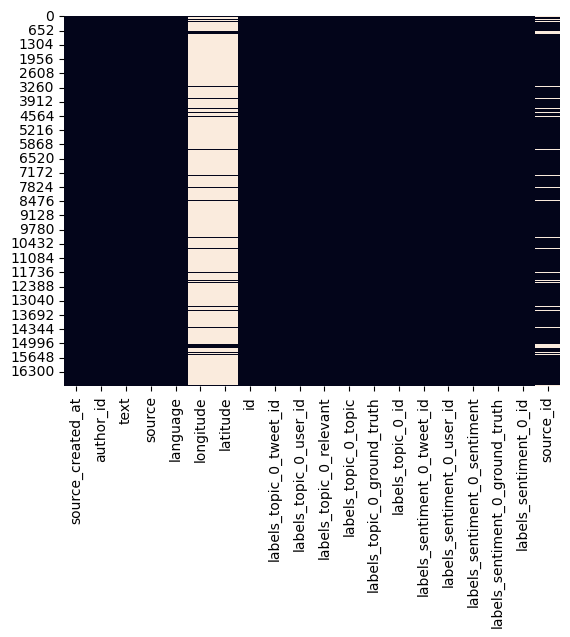

In [27]:
# Create a heatmap of missing values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
df.isnull().sum()

source_created_at                      0
author_id                              0
text                                   0
source                                 0
language                               0
longitude                          15524
latitude                           15524
id                                     0
labels_topic_0_tweet_id                0
labels_topic_0_user_id                 0
labels_topic_0_relevant                0
labels_topic_0_topic                   0
labels_topic_0_ground_truth            0
labels_topic_0_id                      0
labels_sentiment_0_tweet_id            0
labels_sentiment_0_user_id             0
labels_sentiment_0_sentiment           0
labels_sentiment_0_ground_truth        0
labels_sentiment_0_id                  0
source_id                           1401
dtype: int64

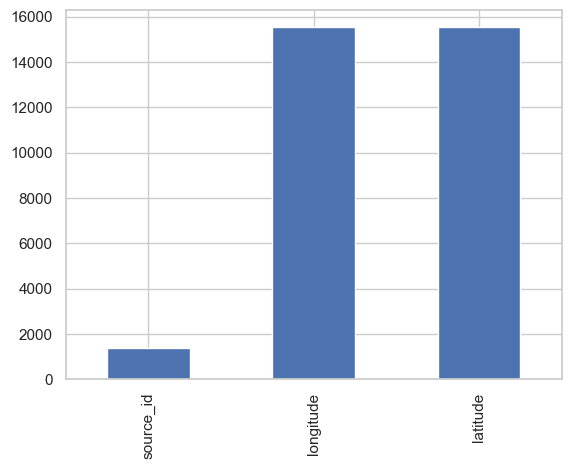

In [ ]:
#Create a barplot of missing values by using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()


IT IS SEEN THAT LONGITUDE AND LATITUDE COLUMNS CANNOT BE USED. ALSO SOURCE_ID COLUMN'S MISSING DATA SHOULD BE EVALUATED

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


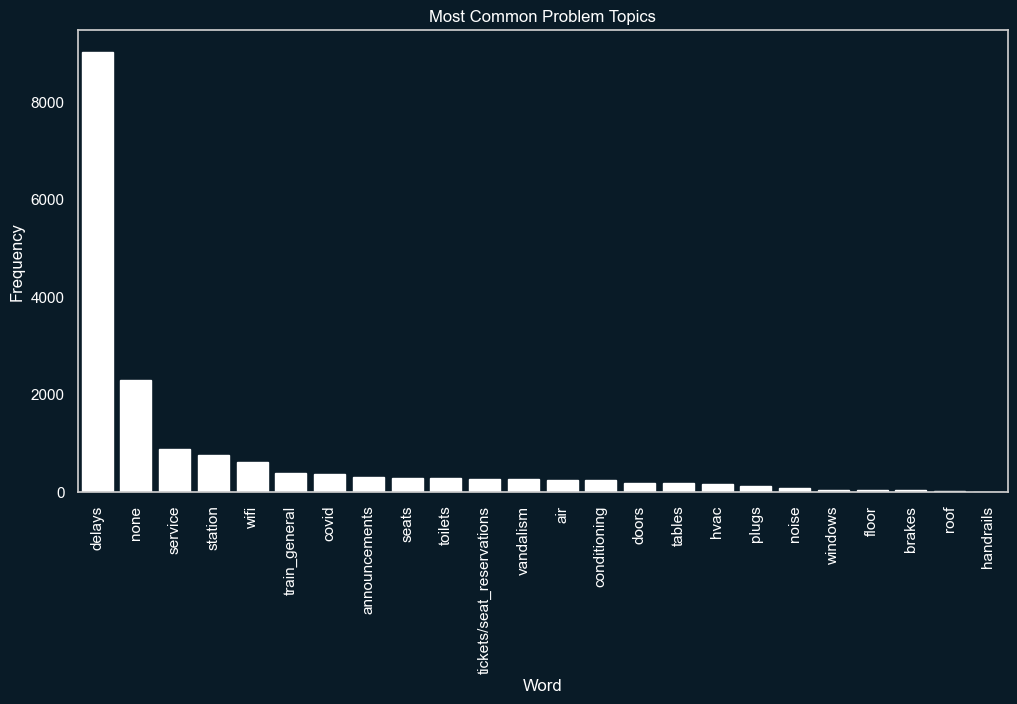

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocess the data
nltk.download('stopwords')
stop = stopwords.words('english')
df['labels_topic_0_topic'] = df['labels_topic_0_topic'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Count most common words
most_common_words = Counter(" ".join(df['labels_topic_0_topic']).split()).most_common()
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']

# Define colors to match the second graph
colors = ['#091B27']

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='word', y='frequency', data=most_common_words, palette=colors)
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.xlabel('Word', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Most Common Problem Topics', color='white')

# Set background color
fig = plt.gcf()
fig.set_facecolor('#091B27')

# Set grid color to #091B27
ax.yaxis.grid(color='#091B27')  # Set y-axis grid color
ax.xaxis.grid(color='#091B27')  # Set x-axis grid color

# Set axes background color to #091B27
ax.set_facecolor('#091B27')

# Set bar colors to white
for bar in ax.patches:
    bar.set_facecolor('white')

# Set color of x-axis tick labels to #091B27
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()


<Axes: >

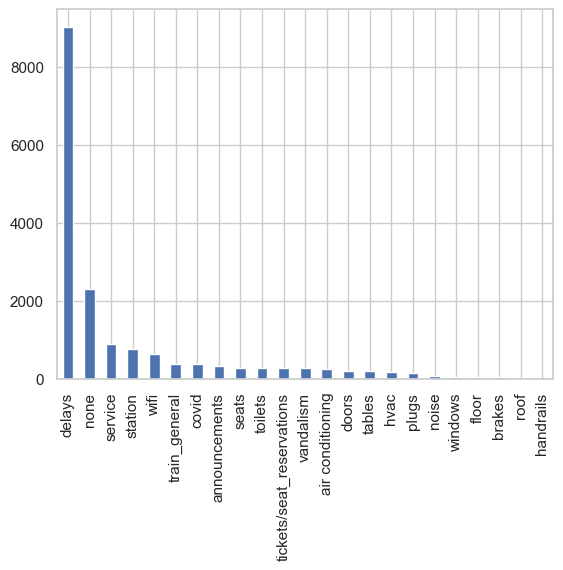

In [ ]:
df["labels_topic_0_topic"].value_counts().plot.bar()

In [ ]:
#Find the how many row are named as "delays"in labels_topic_0_topic column
df["labels_topic_0_topic"].value_counts().head(1)
print(df["labels_topic_0_topic"].value_counts().head(1))
#Find the ratio of "delays" in labels_topic_0_topic column
df["labels_topic_0_topic"].value_counts(normalize=True).head(1)
print(df["labels_topic_0_topic"].value_counts(normalize=True).head(1))

delays    9023
Name: labels_topic_0_topic, dtype: int64
delays    0.532362
Name: labels_topic_0_topic, dtype: float64


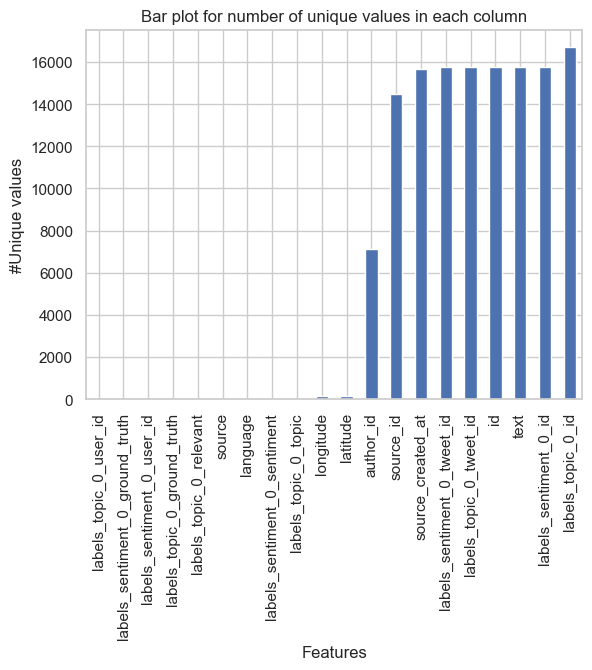

In [28]:
#Create a bar plot for number of unique values in each column
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
unique_values = df.nunique()
unique_values.sort_values(inplace=True)
unique_values.plot.bar()
plt.title('Bar plot for number of unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

**TOPIC: IS DATA REPRESENTATIVE**

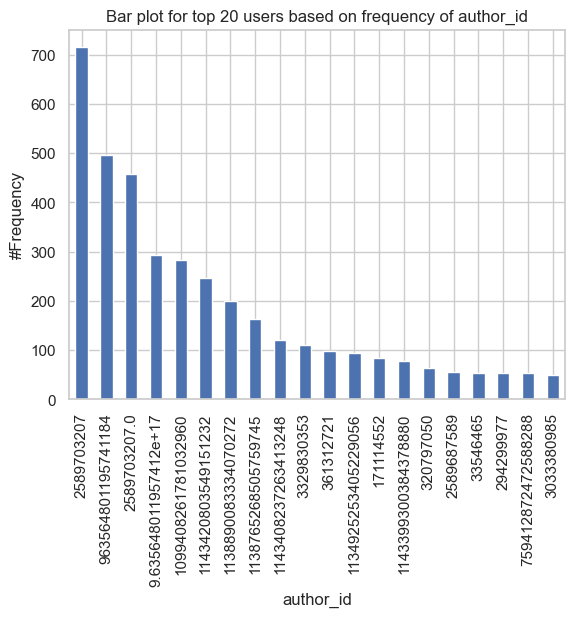

In [ ]:
# Create a bar plot regarding top 20 users based on frequency of author_id
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
top_20_users = df['author_id'].value_counts().head(20)
top_20_users.plot.bar()
plt.title('Bar plot for top 20 users based on frequency of author_id')
plt.ylabel('#Frequency', fontsize=12)
plt.xlabel('author_id', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Find total quantity of users regarding author_id
print("Total number of user is :", df['author_id'].nunique())
#Find average number of tweets per user
print("Average number of tweets per user is :", df['author_id'].count()/df['author_id'].nunique())

Total number of user is : 7139
Average number of tweets per user is : 2.374142036699818


We have 7139 different users and each of them sent approximately 2.4 tweets 

In [ ]:
#Find how many tweets are posted in each year
df['source_created_at'] = pd.to_datetime(df['source_created_at'])
df['source_created_at'].dt.year.value_counts()

2019    11764
2020     5185
Name: source_created_at, dtype: int64

In [ ]:
#Find how many tweets are posted in each month and sort them
df['source_created_at'] = pd.to_datetime(df['source_created_at'])
df['source_created_at'].dt.month.value_counts().sort_values()

6      693
9      835
4     1133
12    1136
10    1224
8     1232
5     1253
7     1272
11    1404
3     1858
1     2323
2     2586
Name: source_created_at, dtype: int64

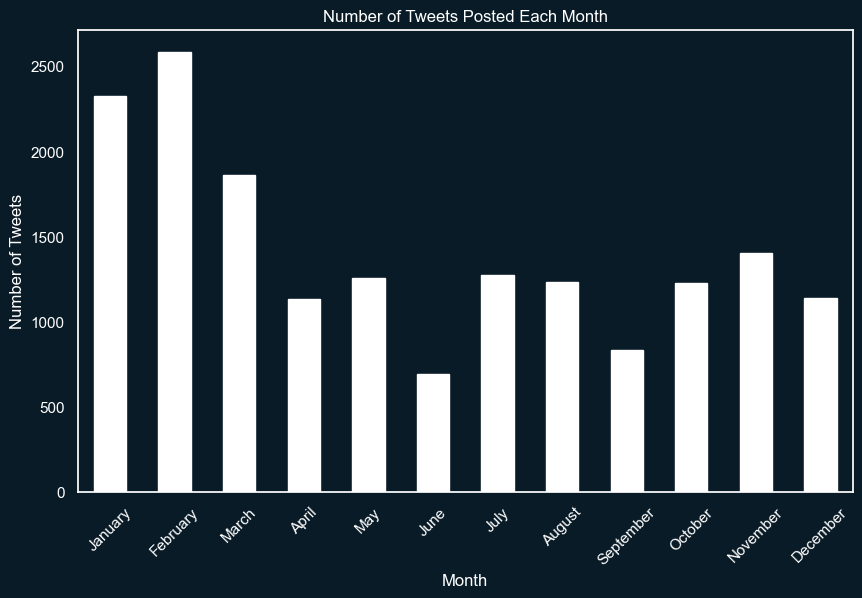

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column named 'source_created_at'
# Convert 'source_created_at' column to datetime format
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Extract the month from the 'source_created_at' column
df['month'] = df['source_created_at'].dt.month

# Count the number of tweets in each month
tweet_counts = df['month'].value_counts().sort_index()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = tweet_counts.plot(kind='bar', color='white')  # Set bar color to white
plt.title('Number of Tweets Posted Each Month', color='white')  # Set title color
plt.xlabel('Month', color='white')  # Set x-axis label color
plt.ylabel('Number of Tweets', color='white')  # Set y-axis label color

# Set background color to #091B27
fig.set_facecolor('#091B27')

# Set text color to white
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the x-axis labels to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tweet_counts.index - 1, month_names, rotation=45, color='white')

# Set grid color to #091B27
ax.yaxis.grid(color='#091B27')  # Set y-axis grid color
ax.xaxis.grid(color='#091B27')  # Set x-axis grid color

# Set axes background color to #091B27
ax.set_facecolor('#091B27')

# Show the plot
plt.show()


Data is collected in all months of the year

In [ ]:
#Show the beginning and end time of the dataset
print(df['source_created_at'].min())
print(df['source_created_at'].max())

2019-01-16 10:41:46
2020-12-01 07:49:12.003000


In [ ]:
import pandas as pd

# Assuming df contains your dataset and 'source_created_at' is the column with tweet times
# Convert 'source_created_at' column to datetime if it's not already in datetime format
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Filter out January 2018 and January 2019
filtered_df = df[~((df['source_created_at'].dt.year == 2018) & (df['source_created_at'].dt.month == 1)) &
                 ~((df['source_created_at'].dt.year == 2019) & (df['source_created_at'].dt.month == 1))]

# Create a new column 'year' to store the year
filtered_df['year'] = filtered_df['source_created_at'].dt.year

# Create a new column 'month' to store the month
filtered_df['month'] = filtered_df['source_created_at'].dt.month

# Group by year and month, and count the number of tweets
tweet_counts = filtered_df.groupby(['year', 'month']).size().reset_index(name='tweet_count')

# Display the result
print(tweet_counts)


    year  month  tweet_count
0   2019      2         1206
1   2019      3         1024
2   2019      4          929
3   2019      5         1159
4   2019      6          661
5   2019      7          931
6   2019      8          725
7   2019      9          695
8   2019     10          988
9   2019     11         1261
10  2019     12         1134
11  2020      1         1272
12  2020      2         1380
13  2020      3          834
14  2020      4          204
15  2020      5           94
16  2020      6           32
17  2020      7          341
18  2020      8          507
19  2020      9          140
20  2020     10          236
21  2020     11          143
22  2020     12            2


C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\3988584199.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['source_created_at'].dt.year
C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\3988584199.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['source_created_at'].dt.month


In [ ]:
#Find used data sources by source column
df['source'].value_counts()


brandwatch    15548
sprinklr       1401
Name: source, dtype: int64

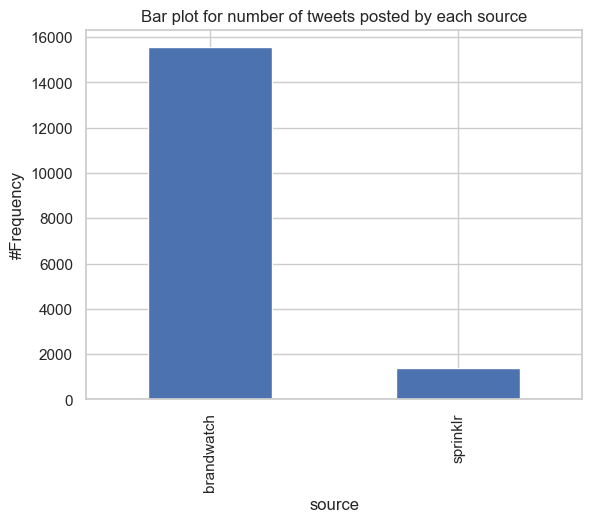

In [ ]:
#Draw a bar plot for number of tweets posted by each source
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
source = df['source'].value_counts()
source.plot.bar()
plt.title('Bar plot for number of tweets posted by each source')
plt.ylabel('#Frequency', fontsize=12)
plt.xlabel('source', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Data is collected from two different sources

In [ ]:
#count how many languages are used
df['language'].value_counts()

en-GB    10051
en        6898
Name: language, dtype: int64

In [ ]:
from langdetect import detect

def detect_language(text):
    try:
        language = detect(text)
        return language
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Apply language detection to the 'text' column and create a new column 'language_check'
df['language_check'] = df['text'].apply(detect_language)

In [ ]:
#show values of language_check column
df['language_check'].value_counts()

en    16935
nl        4
tr        1
tl        1
fr        1
ca        1
it        1
da        1
id        1
fi        1
sv        1
af        1
Name: language_check, dtype: int64

In [ ]:
# Filter rows where 'language' column contains both 'en' and 'en-GB' and 'language_check' is 'en'
mismatched_rows = df[(df['language'].str.contains('en')) & (df['language_check'] == 'en')]

# Print the mismatched rows
print(mismatched_rows)

            source_created_at           author_id  \
0     2020-09-18 21:56:20.798           593731316   
1     2020-10-13 07:31:53.122  745583289520496640   
2     2020-10-26 19:27:24.695           303134761   
3     2020-10-26 19:28:49.281           303134761   
4     2020-09-28 11:59:41.212            56427671   
...                       ...                 ...   
16944 2019-07-11 07:34:35.000            24940900   
16945 2020-08-10 11:19:10.181            63559912   
16946 2020-08-29 09:51:10.833           277455263   
16947 2020-11-02 12:06:06.967          3050957613   
16948 2020-11-02 12:06:06.967          3050957613   

                                                    text      source language  \
0      @DSisourath The Thameslink core between London...    sprinklr       en   
1      @DulwichHistory Loving the complaint about peo...    sprinklr       en   
2      @SW_Help .And yet you have no toilets on some ...    sprinklr       en   
3      @SW_Help you have no toilets on 

***IT SEEN THAT ALL TWEETS ARE WRITTEN IN ENGLISH***

Data is collected mostly in English

In [ ]:
#explote length of text
df['text_length'] = df['text'].str.len()
#preview length of text
df['text_length'].head()

0    134
1    132
2    163
3    186
4    265
Name: text_length, dtype: int64

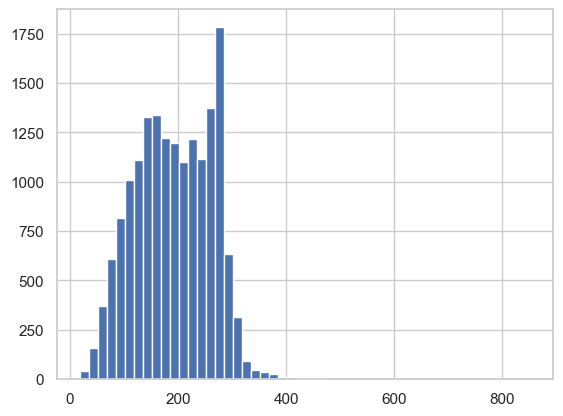

In [ ]:
#create a histogram of text length
import matplotlib.pyplot as plt
df['text_length'].hist(bins=50)
plt.show()

C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\4051032598.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'negative'], color="Red", shade=True)
C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\4051032598.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'positive'], color="Green", shade=True)
C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_18536\4051032598.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'neutral'], c

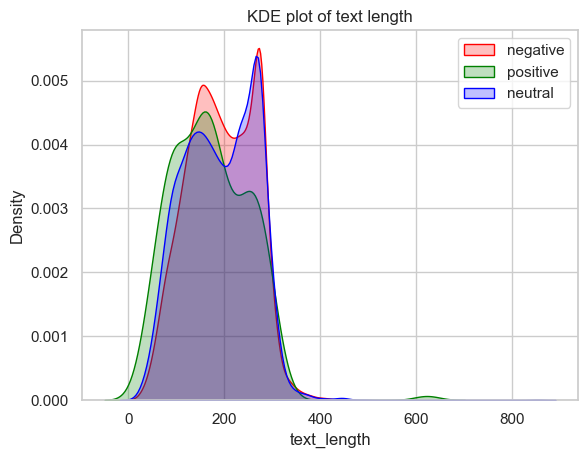

In [ ]:
#create a kdeplot of text length if labels_sentiment_0_sentiment is negative with red color
#and if labels_sentiment_0_sentiment is positive with green color on the same plot
import seaborn as sns
sns.set(style="whitegrid")
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'negative'], color="Red", shade=True)
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'positive'], color="Green", shade=True)
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'neutral'], color="Blue", shade=True)
plt.legend(['negative', 'positive', 'neutral'])
plt.title('KDE plot of text length')
plt.show()

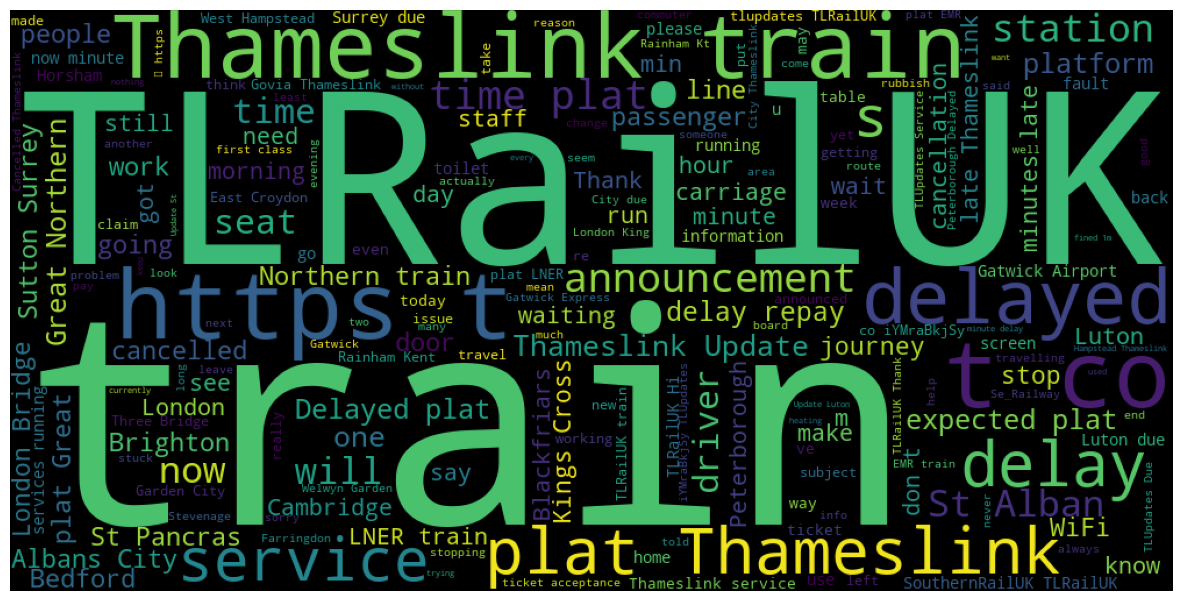

In [ ]:
#Plot a wordcloud of most used 100 words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(df['text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


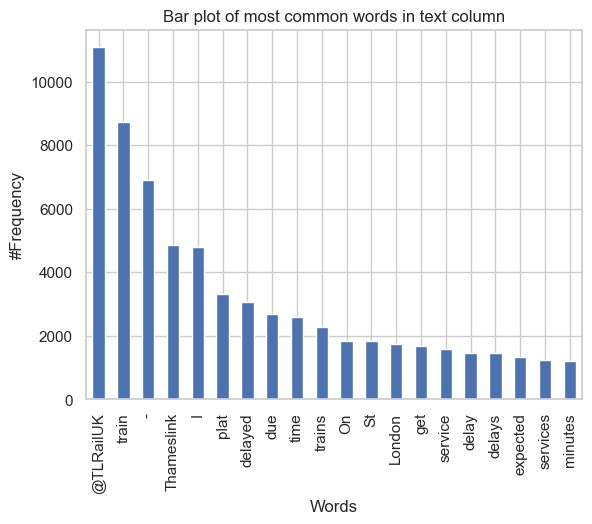

In [ ]:
#Make a list of most common words in text column and show how many times they are used for top 20
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
freq.plot.bar()
plt.title('Bar plot of most common words in text column')
plt.ylabel('#Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd

# Assuming df is your DataFrame with a column named 'text'
# Make sure 'text' column is of type string or object
# You can check the data type using df['text'].dtype

stop = stopwords.words('english')
df['text'] = df['text'].astype(str)  # Make sure 'text' is of string type
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:20]
print(freq)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


@TLRailUK     11081
train          8718
-              6914
Thameslink     4857
I              4803
plat           3304
delayed        3056
due            2673
time           2608
trains         2268
On             1853
St             1839
London         1755
get            1678
service        1591
delay          1470
delays         1462
expected       1343
services       1226
minutes        1201
dtype: int64


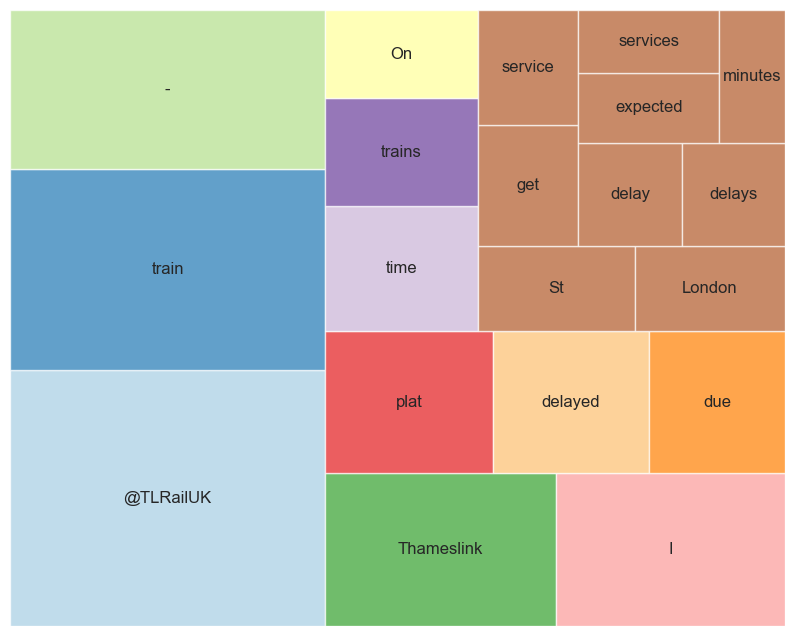

In [ ]:
#Create a tree map of most common words in text column except gaps
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud
# Assuming df is your DataFrame and it contains a 'text' column
# Generate word frequencies for the top 20 words
word_frequencies = df['text'].str.split(expand=True).stack().value_counts().head(20)
# Create labels and sizes for the treemap
labels = word_frequencies.index
sizes = word_frequencies.values
# Create a color palette (optional)
colors = plt.cm.Paired(range(len(labels)))
# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.axis('off')
# Display the treemap
plt.show()


***STOP WORDS NEED TO BE REMOVED***

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


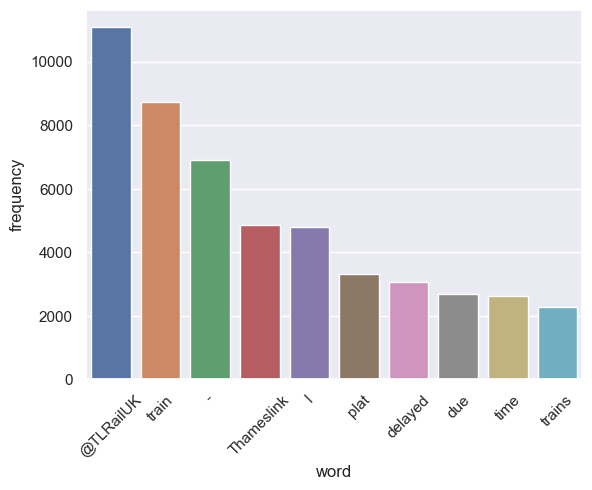

In [ ]:
#Create a bar chart to visualize the most frequent words in the text column
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Counter(" ".join(df['text']).split()).most_common(10)
#Create a bar chart to visualize the most frequent words in the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
Counter(" ".join(df['text']).split()).most_common(10)
most_common_words = Counter(" ".join(df['text']).split()).most_common(10)
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']
most_common_words
sns.barplot(x='word', y='frequency', data=most_common_words)
plt.xticks(rotation=45)
plt.show()

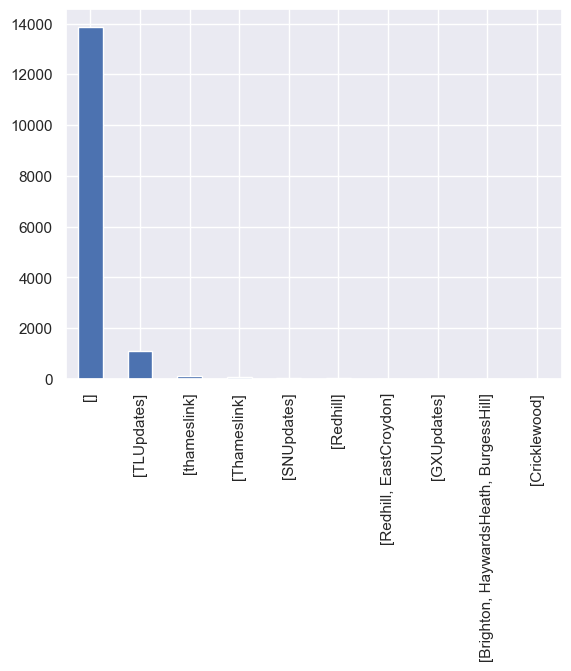

[]    13866
Name: hashtags, dtype: int64


In [ ]:
# Analyze the frequency of different hashtags in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags'].head()
df['hashtags'].value_counts().head(10)
df['hashtags'].value_counts().head(10).plot.bar()
plt.show()

#Write most frequent hashtag
df['hashtags'].value_counts().head(1)
print(df['hashtags'].value_counts().head(1))


In [ ]:
#Show most frequent hashtag and its text columns for top 1
df[['hashtags', 'text']][df['hashtags'] == 'coronavirus'].head(1)
print(df[['hashtags', 'text']][df['hashtags'] == 'coronavirus'].head(1))

Empty DataFrame
Columns: [hashtags, text]
Index: []


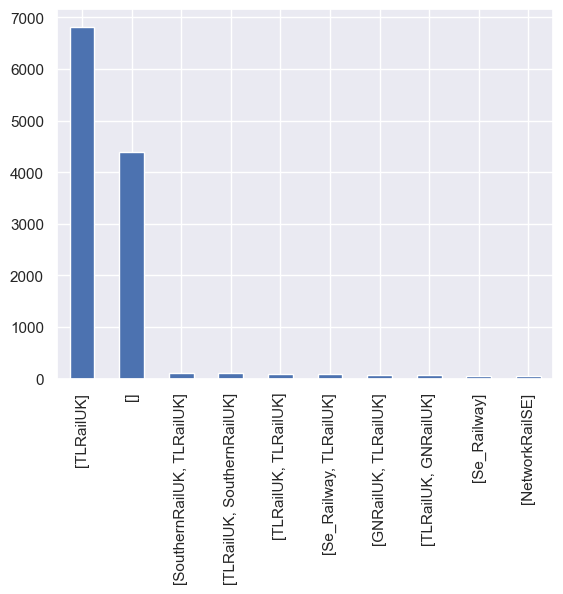

In [ ]:
# Analyze the frequency of different mentions in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['mentions'] = df['text'].apply(lambda x: re.findall(r"@(\w+)", x))
df['mentions'].head()
df['mentions'].value_counts().head(10)
df['mentions'].value_counts().head(10).plot.bar()
plt.show()

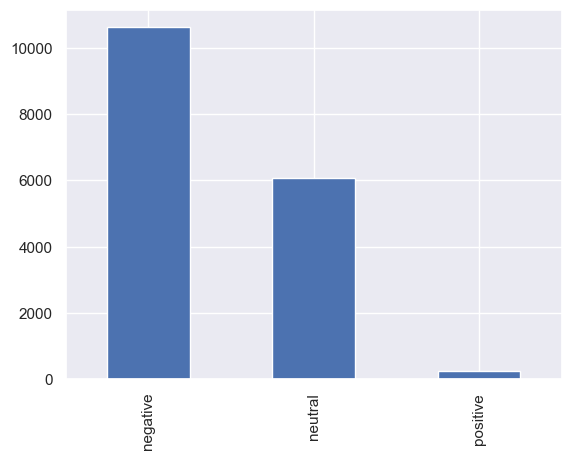

In [ ]:
#Analyze the sentiment of the tweets by labels_sentiment_0_sentiment column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['labels_sentiment_0_sentiment'].value_counts()
df['labels_sentiment_0_sentiment'].value_counts().plot.bar()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Define colors
colors = ['#FFFFFF', '#009285', '#006159']

# Define custom labels
custom_labels = ['Negative', 'Neutral', 'Positive']

# Create a Funnel Chart
fig = go.Figure(go.Funnelarea(
    text=custom_labels,  # Set custom labels
    values=df['labels_sentiment_0_sentiment'].value_counts().values,
    title={"position": "top center", "text": "Funnel-Chart of the Sentiment", "font": {"color": "white"}},
    marker=dict(colors=colors)
))

# Set background color to #091B27
fig.update_layout(paper_bgcolor='#091B27')

fig.show()


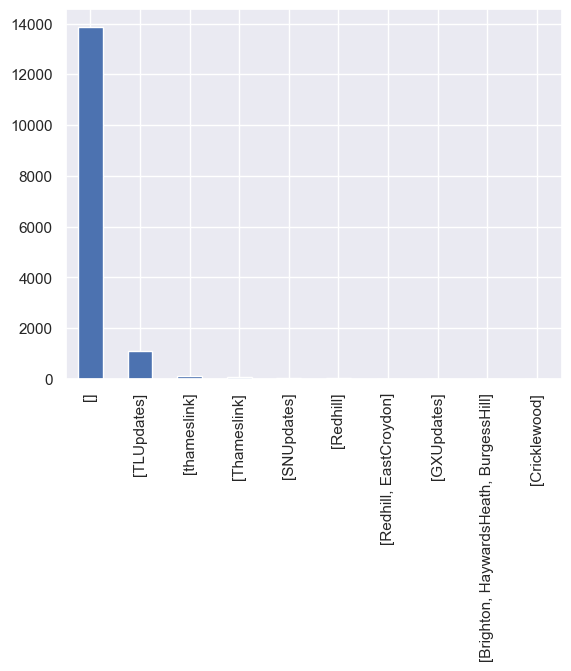

In [ ]:
#Check most used hashtags in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags'].head()
df['hashtags'].value_counts().head(10)
df['hashtags'].value_counts().head(10).plot.bar()
plt.show()

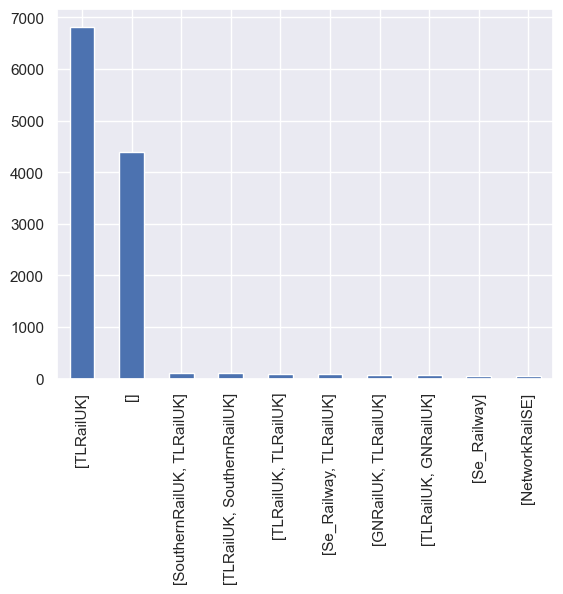

In [ ]:
#Check most used mentions in the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['mentions'] = df['text'].apply(lambda x: re.findall(r"@(\w+)", x))
df['mentions'].head()
df['mentions'].value_counts().head(10)
df['mentions'].value_counts().head(10).plot.bar()
plt.show()